In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load data
df = pd.read_csv('/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Performance_model_betas.csv')

# Renaming terms clearly for plotting
rename_dict = {
    '(Intercept)': 'Intercept',
    'Dwelling_Time_Building_Gaze_Centered': 'Dwell time Building',
    'Dwelling_Time_Agent_Gaze_Centered': 'Dwell time agent',
    'ContextEffectfPublic': 'Building (Residential vs. Public)',
    'Agent_TypefCongruent_vs_Acontextual': 'Acontextual Vs. Congruent',
    'Agent_TypefIncongruent_vs_Acontextual': 'Acontextual Vs. Incongruent',
    'median': 'Median GTE'
}

# Correctly overwrite the 'Predictor' column
df['Predictor'] = df['Predictor'].replace(rename_dict)

# Sort according to your desired factor order
factor_order = [
    'Dwell time Building', 
    'Dwell time agent',
    'Building (Residential vs. Public)',
    'Acontextual Vs. Congruent',
    'Acontextual Vs. Incongruent',
    'Median GTE',
    'Intercept'
][::-1]

# Now indexing works correctly
df = df.set_index('Predictor').loc[factor_order].reset_index()

# Add annotation column
df["Anotate"] = df["Estimate"].round(2).astype(str)


In [3]:
df.head()

Predictor  Estimate  CI_lower  CI_upper Anotate
0                          Intercept  4.020490  3.865337  4.175011    4.02
1                         Median GTE -0.308926 -0.481155 -0.132154   -0.31
2        Acontextual Vs. Incongruent -0.163168 -0.239175 -0.087680   -0.16
3          Acontextual Vs. Congruent  0.086011 -0.004006  0.175520    0.09
4  Building (Residential vs. Public) -0.089369 -0.139845 -0.039494   -0.09

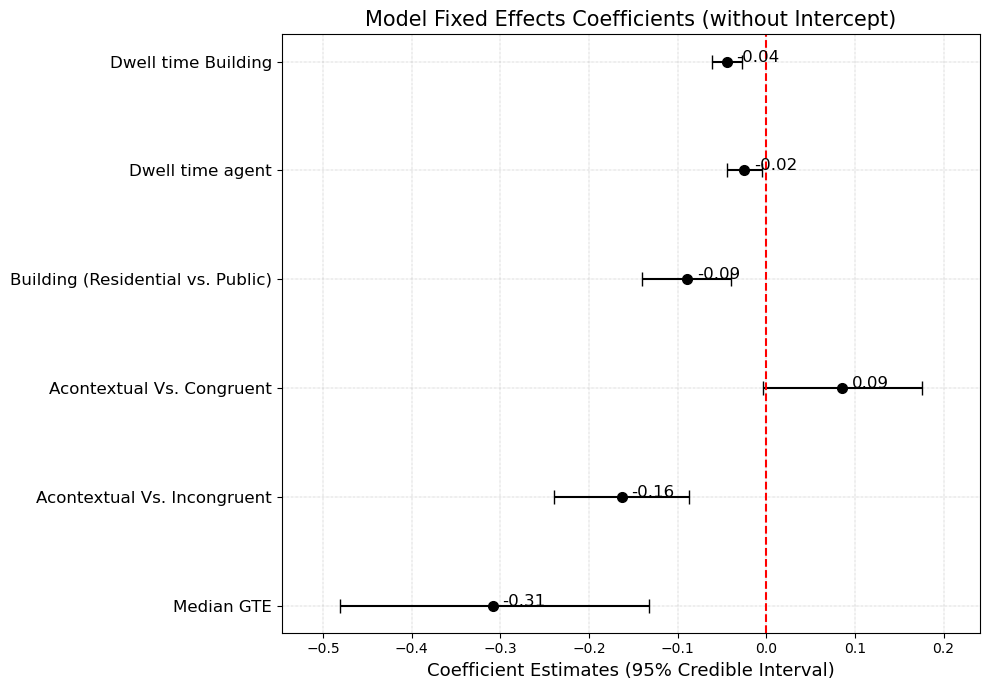

In [4]:
# Filter out the intercept before plotting
df_no_intercept = df[df["Predictor"] != "Intercept"].reset_index(drop=True)

# Recompute y-axis positions after filtering
y_positions = np.arange(len(df_no_intercept))

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Plot with error bars
ax.errorbar(
    x=df_no_intercept["Estimate"], 
    y=y_positions, 
    xerr=[df_no_intercept["Estimate"] - df_no_intercept["CI_lower"], df_no_intercept["CI_upper"] - df_no_intercept["Estimate"]],
    fmt='o',
    color='black',
    markersize=7,
    capsize=5
)

# Annotate points
for xi, yi, annotation in zip(df_no_intercept["Estimate"], y_positions, df_no_intercept["Anotate"]):
    ax.annotate(annotation, (xi, yi), textcoords="offset points",
                xytext=(7, 0), ha='left', fontsize=12)

# Reference line at zero
ax.axvline(x=0, color='red', linestyle='--')

# Customize grid
ax.grid(True, linestyle='-.', linewidth=0.3)

# Set y-ticks to factor names
ax.set_yticks(y_positions)
ax.set_yticklabels(df_no_intercept["Predictor"], fontsize=12)

# Set labels and title
ax.set_xlabel("Coefficient Estimates (95% Credible Interval)", fontsize=13)
ax.set_title("Model Fixed Effects Coefficients (without Intercept)", fontsize=15)

# Adjust x-axis limits
x_margin = (df_no_intercept["CI_upper"].max() - df_no_intercept["CI_lower"].min()) * 0.1
ax.set_xlim(df_no_intercept["CI_lower"].min() - x_margin, df_no_intercept["CI_upper"].max() + x_margin)

# Tight layout
plt.tight_layout()

# Save plot as JPG
plt.savefig("Python_Model_Coefficients_no_intercept.jpg", dpi=300, bbox_inches="tight", format='jpg')

# Display plot
plt.show()


In [5]:
# Calculate percentage changes
df_no_intercept['Percent_change'] = (np.exp(df_no_intercept['Estimate']) - 1) * 100
df_no_intercept['Percent_lower'] = (np.exp(df_no_intercept['CI_lower']) - 1) * 100
df_no_intercept['Percent_upper'] = (np.exp(df_no_intercept['CI_upper']) - 1) * 100

# Annotation labels
df_no_intercept["Percent_annotate"] = df_no_intercept["Percent_change"].round(1).astype(str) + '%'

# Sort by percentage change for bar plot clarity
df_sorted = df_no_intercept.sort_values(by='Percent_change', ascending=False).reset_index(drop=True)


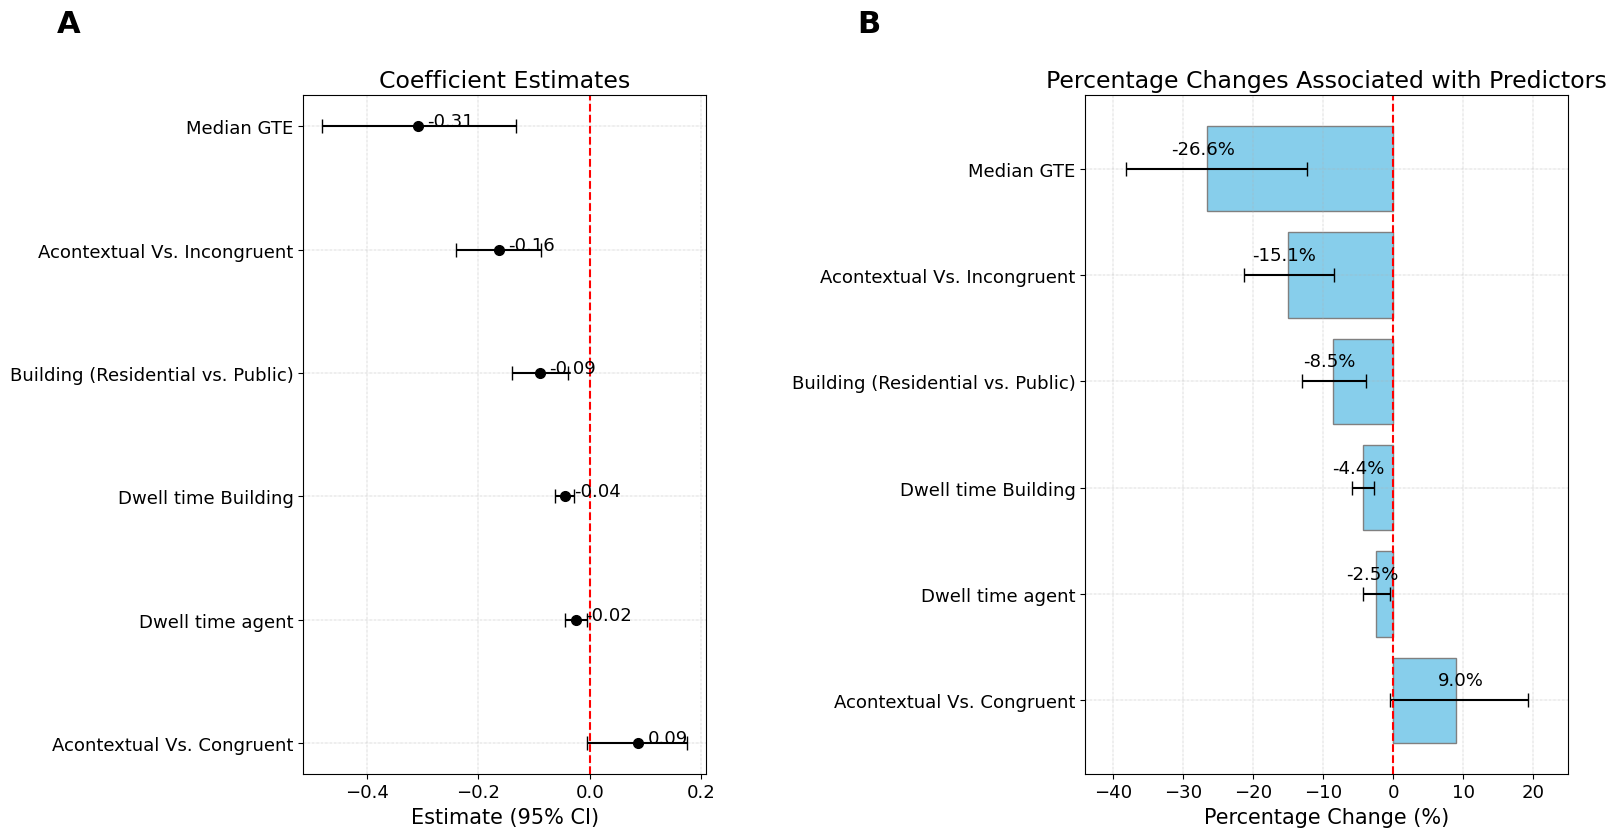

In [14]:


# Optional: Global font size update (consistency)
plt.rcParams.update({'font.size': 14})

# Sort df_no_intercept to match df_sorted exactly
df_no_intercept_sorted = df_no_intercept.set_index('Predictor').loc[df_sorted['Predictor']].reset_index()

# Define figure layout: two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1.2]})

# === LEFT PLOT: Coefficient Estimates (now sorted!) ===
y_positions_left = np.arange(len(df_no_intercept_sorted))

ax1.errorbar(
    x=df_no_intercept_sorted["Estimate"], 
    y=y_positions_left,
    xerr=[df_no_intercept_sorted["Estimate"] - df_no_intercept_sorted["CI_lower"],
          df_no_intercept_sorted["CI_upper"] - df_no_intercept_sorted["Estimate"]],
    fmt='o',
    color='black',
    markersize=7,
    capsize=5
)

# Annotate left plot
for xi, yi, annotation in zip(df_no_intercept_sorted["Estimate"], y_positions_left, df_no_intercept_sorted["Anotate"]):
    ax1.annotate(annotation, (xi, yi), xytext=(7, 0), textcoords='offset points', fontsize=13)

ax1.axvline(x=0, color='red', linestyle='--')
ax1.grid(True, linestyle='-.', linewidth=0.3)
ax1.set_yticks(y_positions_left)
ax1.set_yticklabels(df_no_intercept_sorted["Predictor"], fontsize=14)
ax1.set_xlabel("Estimate (95% CI)", fontsize=15)
ax1.set_title("Coefficient Estimates", fontsize=17)
ax1.tick_params(axis='both', labelsize=13)

# === RIGHT PLOT: Percentage Changes (sorted as before) ===
y_positions_right = np.arange(len(df_sorted))

ax2.barh(
    y=y_positions_right, 
    width=df_sorted["Percent_change"],
    xerr=[df_sorted["Percent_change"] - df_sorted["Percent_lower"],
          df_sorted["Percent_upper"] - df_sorted["Percent_change"]],
    color='skyblue',
    edgecolor='gray',
    capsize=5
)

# Annotate right plot ABOVE bars clearly
for xi, yi, annotation in zip(df_sorted["Percent_change"], y_positions_right, df_sorted["Percent_annotate"]):
    offset = 3 if xi >= 0 else -3
    ax2.annotate(
        annotation, 
        (xi, yi),
        xytext=(offset, 8), 
        textcoords='offset points',
        fontsize=13,
        ha='center', 
        va='bottom', 
        color='black'
    )

ax2.axvline(x=0, color='red', linestyle='--')
ax2.grid(True, linestyle='-.', linewidth=0.3)
ax2.set_yticks(y_positions_right)
ax2.set_yticklabels(df_sorted["Predictor"], fontsize=14)
ax2.set_xlabel("Percentage Change (%)", fontsize=15)
ax2.set_title("Percentage Changes Associated with Predictors", fontsize=17)
ax2.tick_params(axis='both', labelsize=13)

# Adjust x-axis limits
x_margin = (df_sorted["Percent_upper"].max() - df_sorted["Percent_lower"].min()) * 0.1
ax2.set_xlim(df_sorted["Percent_lower"].min() - x_margin, df_sorted["Percent_upper"].max() + x_margin)

# Tight layout for clean look
fig.tight_layout(w_pad=4)

# Add scientific annotations to the figure
annotations = {'A': (0.05, 1.02), 'B': (0.55, 1.02)}

for text, location in annotations.items():
    fig.text(location[0], location[1], text, fontsize=22, fontweight='bold', fontfamily='sans-serif', ha='center')

# Save combined plot
plt.savefig("Combined_Estimates_PercentChanges_Sorted.jpg", dpi=300, bbox_inches="tight", format='jpg')

# Display the combined plot
plt.show()
